## UnderDetermined Systems

comparing least $||s||_1$ and least $||s||_2$ solutions

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os

from scipy.optimize import minimize

In [13]:
plt.rcParams['figure.figsize'] = (12,12)

In [7]:

# solve for y = Theta * s
n = 1000
p = 200

Theta = np.random.randn(p,n)
y = np.random.randn(p)

def l1_norm(x):
    return np.linalg.norm(x,1)

In [8]:
constr = ({'type':'eq', 'fun': lambda x: Theta @ x - y})
x0 = np.linalg.pinv(Theta) @ y

res = minimize(l1_norm, x0, method = 'SLSQP', constraints = constr)
s_l1 = res.x

In [9]:
s_l2 = np.linalg.pinv(Theta) @ y

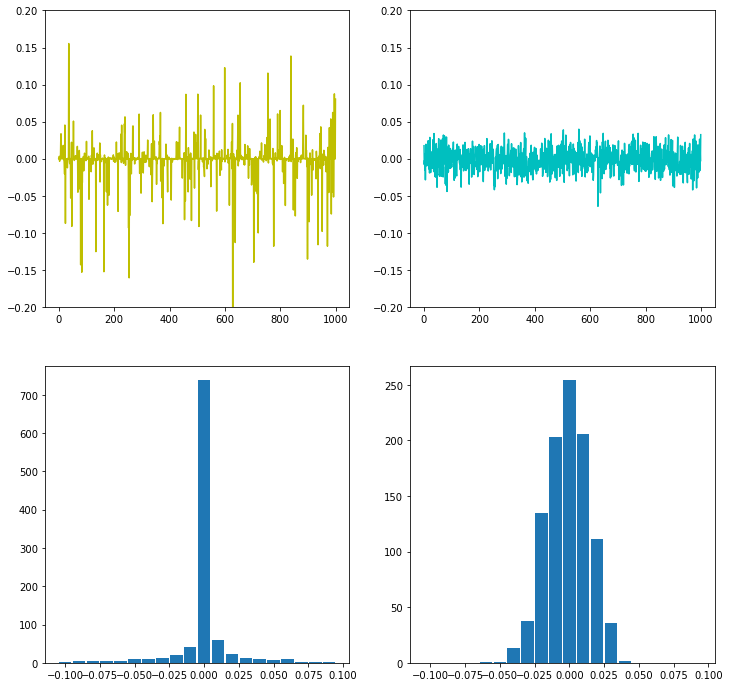

In [18]:
fig, axes = plt.subplots(2,2)
axes = axes.reshape(-1)

axes[0].plot(s_l1, color = 'y', linewidth = 1.5)
axes[0].set_ylim(-0.2, 0.2)

axes[1].plot(s_l2, color = 'c', linewidth = 1.5)
axes[1].set_ylim(-0.2, 0.2)

axes[2].hist(s_l1, bins = np.arange(-0.105, 0.105, 0.01), rwidth = 0.9)
axes[3].hist(s_l2, bins = np.arange(-0.105, 0.105, 0.01), rwidth = 0.9)

plt.show()

## Robust Regression with L1 Norm

In [69]:
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams.update({'font.size':18})

In [70]:
x = np.sort(4*(np.random.rand(25,1) - 0.5), axis = 0)
b = 0.9*x + 0.1*np.random.randn(len(x),1)

In [71]:
atrue = np.linalg.lstsq(x,b,rcond=None)[0].item(0)

In [72]:
b[-1] = -5.5
al2 = np.linalg.lstsq(x,b,rcond=None)[0].item(0)

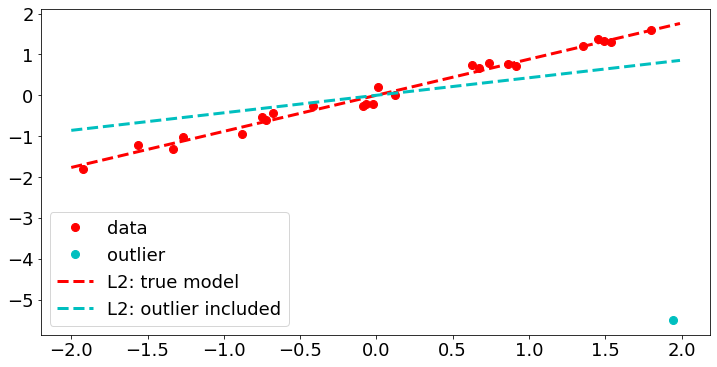

In [73]:
plt.plot(x[:-1], b[:-1], 'o', color = 'r', ms=8, label = 'data')
plt.plot(x[-1], b[-1], 'o', color = 'c', ms=8, label = 'outlier')


xgrid = np.arange(-2,2, .01)

plt.plot(xgrid, atrue*xgrid, '--', linewidth=3, color='r', label = 'L2: true model')
plt.plot(xgrid, al2*xgrid, '--', linewidth=3, color='c',label = 'L2: outlier included')

plt.legend()
plt.show()

In [74]:
def l1_norm(a):
    return np.linalg.norm(a*x - b,1)

In [75]:
a0 = al2
res = minimize(l1_norm, a0)
al1 = res.x[0]

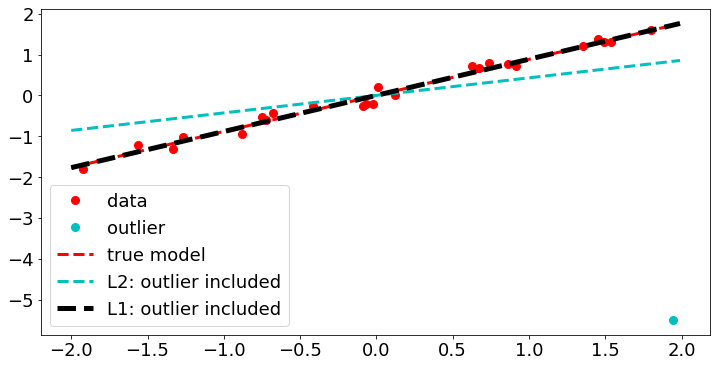

In [76]:
plt.plot(x[:-1], b[:-1], 'o', color = 'r', ms=8, label = 'data')
plt.plot(x[-1], b[-1], 'o', color = 'c', ms=8, label = 'outlier')


xgrid = np.arange(-2,2, .01)

plt.plot(xgrid, atrue*xgrid, '--', linewidth=3, color='r', label = 'true model')
plt.plot(xgrid, al2*xgrid, '--', linewidth=3, color='c',label = 'L2: outlier included')
plt.plot(xgrid, al1*xgrid, '--', linewidth=5, color='black',label = 'L1: outlier included')

plt.legend()
plt.show()